NVT Data Sample:
      time_fs  potential_energy   time_ps
0  298.000000          0.000000  0.298000
1  284.448272          1.084422  0.284448
2  254.687538          0.303056  0.254688
3  232.424362          0.284599  0.232424
4  228.429898          0.287809  0.228430

NPT Data Sample:
      time_fs  potential_energy   time_ps
0  297.912353          0.000000  0.297912
1  297.373337          1.028806  0.297373
2  295.935774          0.301171  0.295936
3  295.862502          0.330167  0.295863
4  295.378827          0.302331  0.295379


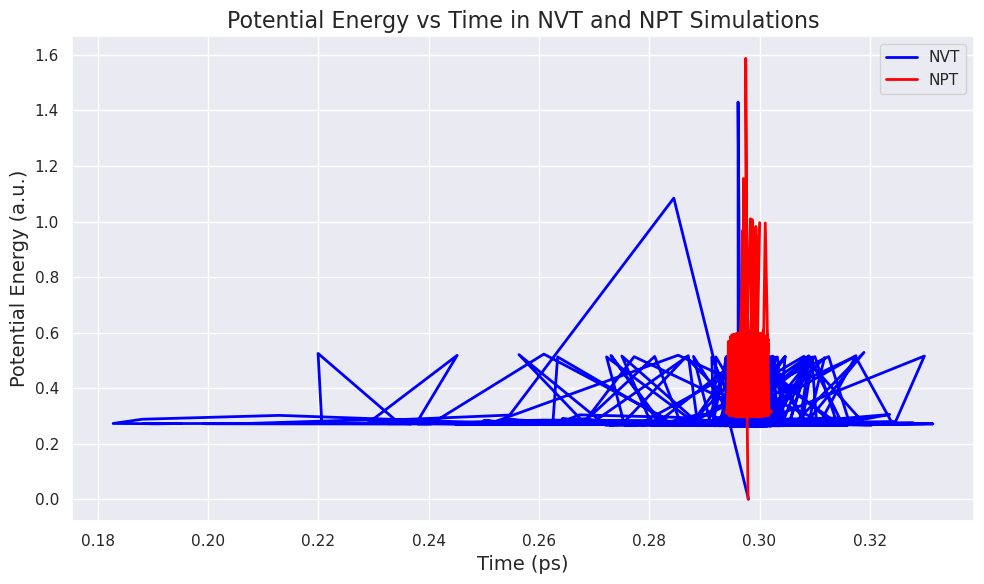

Plot saved to ../Figures/potential_energy_vs_time.png
Average Potential Energy (NVT): 0.29 a.u.
Average Potential Energy (NPT): 0.33 a.u.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's theme settings (recommended)
sns.set_theme(style='darkgrid')

# Define the file paths
nvt_file_path = '../Outputs/NVT-1.ener'  # Modify as per actual path
npt_file_path = '../Outputs/NPT-1.ener'  # Modify as per actual path

# Function to load and clean data for both NVT and NPT
def load_energy_data(file_path, time_col, potential_col):
    # Read only relevant columns (Time and Potential Energy)
    data = pd.read_csv(file_path, sep='\s+', header=0, usecols=[time_col, potential_col], engine='python', na_values=["nan", "NaN", "N/A"])

    # Rename the columns for consistency
    data.rename(columns={time_col: 'time_fs', potential_col: 'potential_energy'}, inplace=True)
    
    # Convert Time from femtoseconds to picoseconds (1 fs = 0.001 ps)
    data['time_ps'] = data['time_fs'] / 1000
    
    # Convert potential energy to numeric (in case there are any errors in the data)
    data['potential_energy'] = pd.to_numeric(data['potential_energy'], errors='coerce')
    
    # Drop any rows where potential energy is NaN
    data.dropna(subset=['potential_energy'], inplace=True)
    
    return data

# Load the NVT data (assuming same format as NPT, so using same function)
nvt_data = load_energy_data(nvt_file_path, 'Time[fs]', 'Pot.[a.u.]')

# Load the NPT data
npt_data = load_energy_data(npt_file_path, 'Time[fs]', 'Pot.[a.u.]')

# Display the first few rows of the datasets to verify their content
print("NVT Data Sample:")
print(nvt_data.head())

print("\nNPT Data Sample:")
print(npt_data.head())

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot NVT potential energy vs time (using time in picoseconds for both)
plt.plot(nvt_data['time_ps'], nvt_data['potential_energy'], label='NVT', color='blue', lw=2)

# Plot NPT potential energy vs time
plt.plot(npt_data['time_ps'], npt_data['potential_energy'], label='NPT', color='red', lw=2)

# Add titles and labels
plt.title('Potential Energy vs Time in NVT and NPT Simulations', fontsize=16)
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Potential Energy (a.u.)', fontsize=14)
plt.legend()

# Save the plot to the Figures directory
output_figure_path = '../Figures/potential_energy_vs_time.png'
plt.tight_layout()
plt.savefig(output_figure_path)

# Display the plot
plt.show()

# Print the output file path
print(f"Plot saved to {output_figure_path}")

# Calculate the average potential energy for both NVT and NPT simulations
nvt_avg_energy = nvt_data['potential_energy'].mean()
npt_avg_energy = npt_data['potential_energy'].mean()

print(f"Average Potential Energy (NVT): {nvt_avg_energy:.2f} a.u.")
print(f"Average Potential Energy (NPT): {npt_avg_energy:.2f} a.u.")


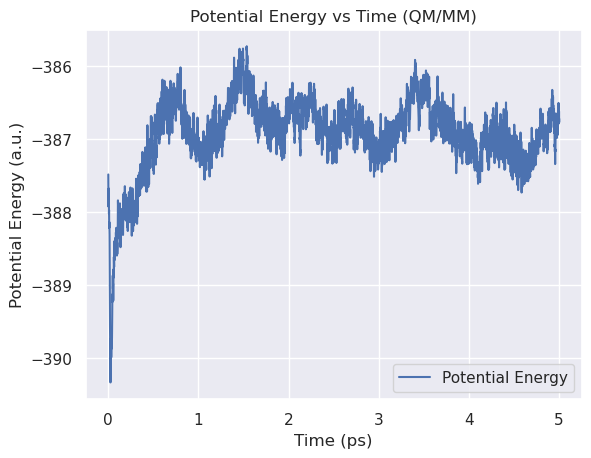

In [2]:
import pandas as pd

# 에너지 데이터 읽기
energy_data = pd.read_csv('../Outputs/monitor/MONITOR-1.ener', delim_whitespace=True, comment='#', 
                          names=['Step', 'Time_fs', 'Kin_au', 'Temp_K', 'Pot_au', 'Cons_Qty_au', 'UsedTime_s'])

# 시간(ps)로 변환
energy_data['Time_ps'] = energy_data['Time_fs'] / 1000.0

import matplotlib.pyplot as plt

# 잠재 에너지 vs 시간 그래프
plt.plot(energy_data['Time_ps'], energy_data['Pot_au'], label='Potential Energy')

# 그래프 설정
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time (QM/MM)')
plt.legend()
plt.grid(True)
plt.savefig('../Figures/qmmm_potential_energy_vs_time.png')  # 결과 저장
plt.show()

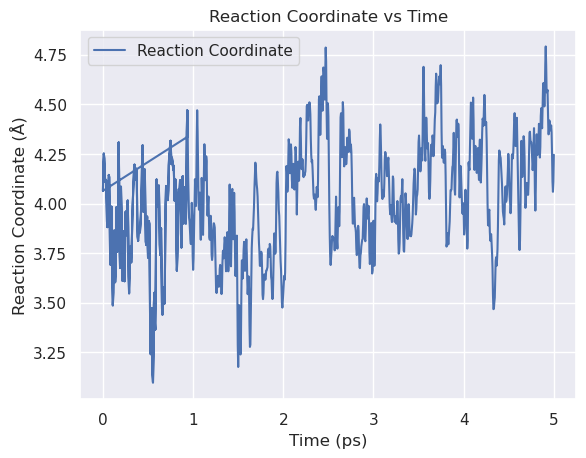

In [3]:
import pandas as pd

# COLVAR 데이터 읽기
colvar_data = pd.read_csv('../Outputs/monitor/MONITOR-COLVAR.metadynLog', delim_whitespace=True, comment='#',
                          names=['Time_fs', 'Reaction_Coordinate', 'Col3', 'Col4', 'Col5', 'Col6'])

# 시간(fs)을 ps로 변환
colvar_data['Time_ps'] = colvar_data['Time_fs'] / 1000.0

import matplotlib.pyplot as plt

# 반응 경로 그래프
plt.plot(colvar_data['Time_ps'], colvar_data['Reaction_Coordinate'], label='Reaction Coordinate')

# 그래프 설정
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate (Å)')  # 단위는 정의에 따라 변경 가능
plt.title('Reaction Coordinate vs Time')
plt.legend()
plt.grid(True)

# 그래프 저장
plt.savefig('../Figures/reaction_coordinate_vs_time.png')
plt.show()

count    6001.000000
mean       -0.334106
std         5.551038
min        -9.755830
25%        -5.077850
50%        -1.254500
75%         4.832480
max         9.331340
Name: Reaction_Coordinate, dtype: float64
Reaction occurred: True


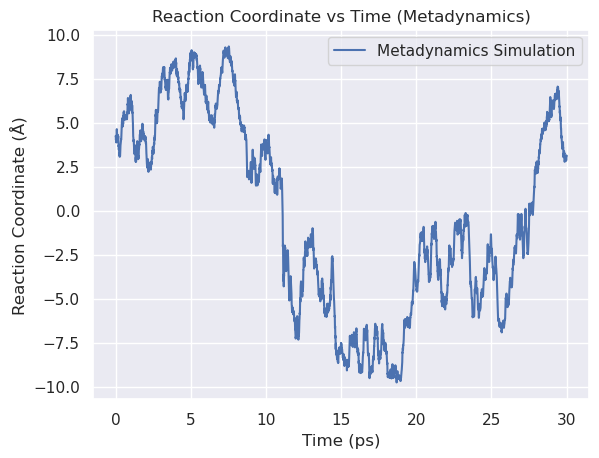

In [8]:
import pandas as pd

# 메타다이내믹스 데이터 읽기
metad_data = pd.read_csv('../Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog', delim_whitespace=True, header=None,
                         names=['Time_fs', 'Reaction_Coordinate', 'Col3', 'Col4', 'Col5', 'Col6'])

# 시간(fs)을 ps로 변환
metad_data['Time_ps'] = metad_data['Time_fs'] / 1000.0

# 반응 좌표 값 출력
print(metad_data['Reaction_Coordinate'].describe())

# 반응 여부 확인 (예: +에서 -로 전환)
reaction_occurred = (metad_data['Reaction_Coordinate'].min() < 0) and (metad_data['Reaction_Coordinate'].max() > 0)
print(f"Reaction occurred: {reaction_occurred}")

import matplotlib.pyplot as plt

# 반응 좌표 vs 시간 그래프
plt.plot(metad_data['Time_ps'], metad_data['Reaction_Coordinate'], label='Metadynamics Simulation')

# 그래프 설정
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate (Å)')
plt.title('Reaction Coordinate vs Time (Metadynamics)')
plt.legend()
plt.grid(True)

# 그래프 저장 및 표시
plt.savefig('../Figures/metadynamics_reaction_coordinate.png')
plt.show()

count    2736.000000
mean       -1.421817
std         6.701755
min       -19.825120
25%        -6.667867
50%        -1.982005
75%         4.377388
max        10.323000
Name: Reaction_Coordinate, dtype: float64
Reaction occurred: True


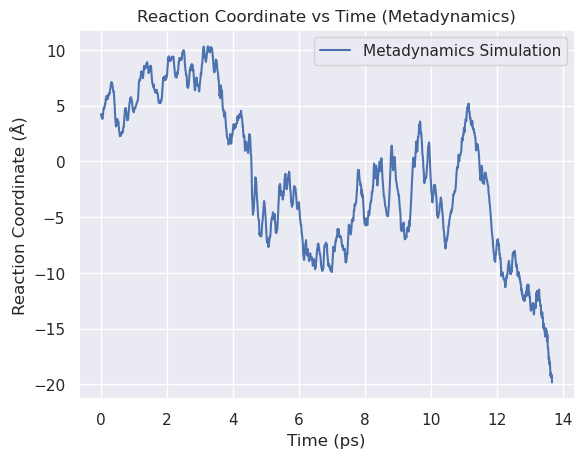

In [11]:
import pandas as pd

# 메타다이내믹스 데이터 읽기
metad_data = pd.read_csv('../Outputs/metad1_initmonitor_freqhills/METADYN-COLVAR.metadynLog', delim_whitespace=True, header=None,
                         names=['Time_fs', 'Reaction_Coordinate', 'Col3', 'Col4', 'Col5', 'Col6'])

# 시간(fs)을 ps로 변환
metad_data['Time_ps'] = metad_data['Time_fs'] / 1000.0

# 반응 좌표 값 출력
print(metad_data['Reaction_Coordinate'].describe())

# 반응 여부 확인 (예: +에서 -로 전환)
reaction_occurred = (metad_data['Reaction_Coordinate'].min() < 0) and (metad_data['Reaction_Coordinate'].max() > 0)
print(f"Reaction occurred: {reaction_occurred}")

import matplotlib.pyplot as plt

# 반응 좌표 vs 시간 그래프
plt.plot(metad_data['Time_ps'], metad_data['Reaction_Coordinate'], label='Metadynamics Simulation')

# 그래프 설정
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate (Å)')
plt.title('Reaction Coordinate vs Time (Metadynamics)')
plt.legend()
plt.grid(True)

# 그래프 저장 및 표시
plt.savefig('../Figures/metadynamics_reaction_coordinate_comparison.png')
plt.show()